In [1]:
import scipy
import numpy as np
from scipy import signal
from matplotlib import pyplot as plt

In [10]:
noise = np.random.rand(256) - 0.5
arr = np.sin(np.linspace(0, 2, 256) * 4 * np.pi)

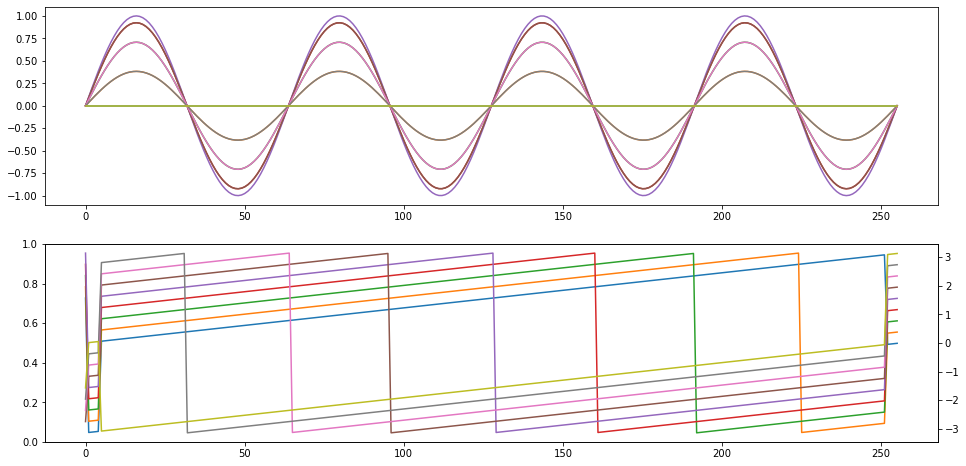

In [11]:
H = np.fft.fft(arr)

amplitude = np.abs(H)
degree = np.arctan2(H.imag, H.real) * 360 / (2 * np.pi) 

n = 9
half = (n-1)//2

fig, axs = plt.subplots(2, figsize=(16, 8))
ax2 = axs[1].twinx()

for i in range(n):
    offset = (i * 90 / half) - 90

    phase = (degree + (i * 90 / half) - 90) * 2 * np.pi / 360

    real = amplitude * np.cos(phase)
    imag = amplitude * np.sin(phase)
    H_hat = np.complex128(real + 1j* imag)
    
    arr_hat = np.fft.ifft(H_hat)
    
    axs[0].plot(arr_hat.real, label= str(offset))
    ax2.plot(np.angle(H_hat))
#     ax2.plot(np.abs(H_hat))
#     ax2.plot(np.angle(H_hat))

plt.show()